# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 4 – Phần 2
# PHÂN TÍCH PHÂN BIỆT TUYẾN TÍNH (LINEAR DISCRIMINANT ANALYSIS - LDA)

In [3]:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## A. BINARY LABELED DATA
## Ví dụ A.1



In [4]:
np.random.seed(12)
means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]
N1 = 50
N2 = 40
N = N1 + N2
X1 = np.random.multivariate_normal(means[0], cov1, N1) # each row is a data point
X2 = np.random.multivariate_normal(means[1], cov2, N2)
# Combine classes and create labels
X = np.vstack((X1, X2))
y = np.hstack((np. ones(50), 2*np.ones(40)))

Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041277  3.04666639]
Mean of Class 2: [ 1.80478915 -0.18249896]


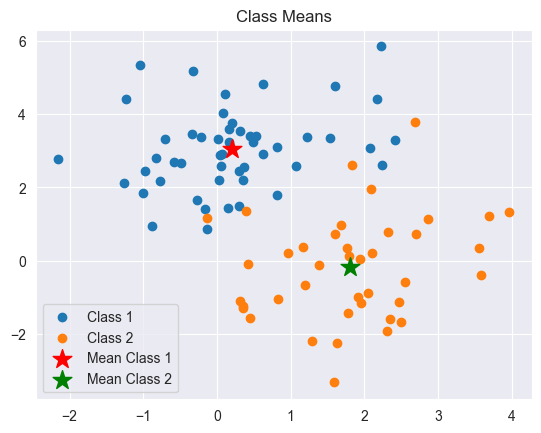

In [5]:
# Separate data by class to class1 (y=0) and class2 (y=1)
class1 = X[y == 1]
class2 = X[y == 2]
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])
# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)
# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [6]:
# Build S_B
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)
a = (m2 - m1)
S_B = a.dot(a.T)
# Build S_W
SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))
S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.56211707 -5.16880049]
 [-5.16880049 10.42750887]]
Within-class covariance matrix: S_W =
 [[ 86.83642101  27.51782236]
 [ 27.51782236 140.23997255]]


In [10]:
L, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
print(W)
print(L)
i = np.argmax(L)
w = W[:, i]
print(w.shape)

[[-0.89596689  0.69467319]
 [-0.44412085 -0.71932549]]
[0.         0.13565422]
(2,)


(50,) (2,)
(2, 50) (2, 40)


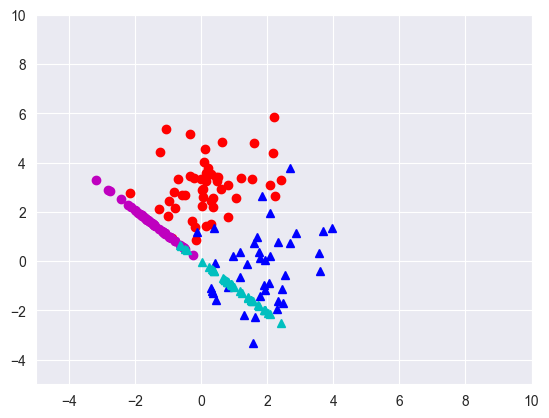

In [11]:
# Visualize data
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.plot(X2[:, 0], X2[:, 1], 'b^')
plt.axis([-5, 10, -5, 10])
#Compute projections of data points on to LDA's dimention
#
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W
print(X1_tmp.shape, w.shape)
X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)
print(X1_p.shape,X2_p.shape)
#Draw projected points
plt.plot(X1_p[0, :], X1_p[1, :], 'mo')
plt.plot(X2_p[0, :], X2_p[1, :], 'c^')
plt.show()

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA and fit the model
lda = LinearDiscriminantAnalysis(n_components=1)

X_lda = lda.fit_transform(X, y)

# Ví dụ A.2 (Bài tập thực hành 1).

In [38]:
df = pd.read_csv("D:\\Hoc may\\Thuc hanh 5\\pd_speech_features.csv")
df.drop("id",axis=1,inplace=True)
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [39]:
species = df["class"].tolist()
X = df.drop("class", axis=1)
y = df['class']
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / X.shape[0]) * X.T.dot(X)



In [40]:
u, s, v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u

In [41]:
pca_full = PCA(n_components=2)
X_pca = pca_full.fit_transform(X)
print("Dữ liệu sau khi giảm chiều bằng PCA:", X_pca.shape)


Dữ liệu sau khi giảm chiều bằng PCA: (756, 2)


In [42]:
u, s, v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u

# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])


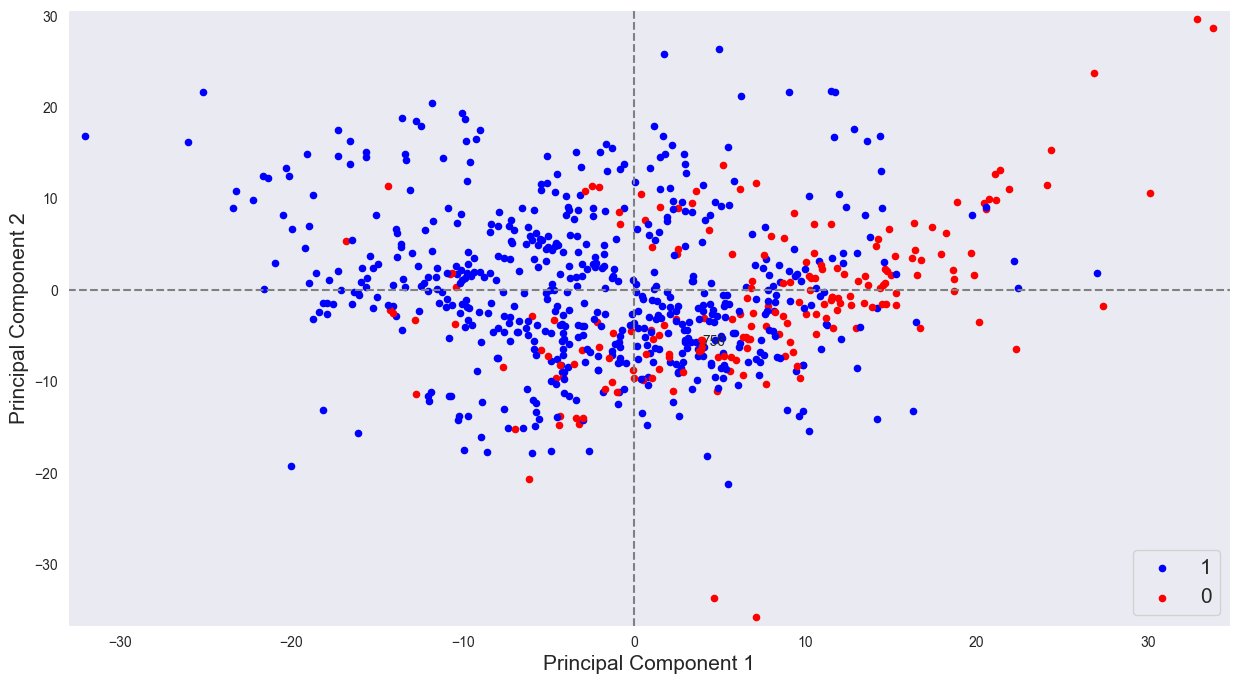

In [43]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
c=species_colors[species_unique.index(spec)])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([pc1.min() - 1, pc1.max() + 1, pc2.min() - 1, pc2.max() + 1])
    plt.show()
plot_scatter(pc1, pc2)


In [44]:
df.columns

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=754)

In [45]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)
print("Dữ liệu sau khi giảm chiều bằng LDA:", X_lda.shape)

Dữ liệu sau khi giảm chiều bằng LDA: (756, 1)


In [46]:
# Chia dữ liệu: 500 bản ghi cho Train, còn lại cho Test
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, train_size=500, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, train_size=500, random_state=42)


In [47]:
# Logistic Regression với dữ liệu LDA
model_lda = LogisticRegression()
model_lda.fit(X_train_lda, y_train_lda)
y_pred_lda = model_lda.predict(X_test_lda)

# Logistic Regression với dữ liệu PCA
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

# Đánh giá hiệu suất
accuracy_lda = accuracy_score(y_test_lda, y_pred_lda)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Độ chính xác Logistic Regression (LDA): {accuracy_lda:.4f}")
print(f"Độ chính xác Logistic Regression (PCA): {accuracy_pca:.4f}")


Độ chính xác Logistic Regression (LDA): 1.0000
Độ chính xác Logistic Regression (PCA): 0.7930


In [48]:
# Naive Bayes với dữ liệu LDA
model_nb_lda = GaussianNB()
model_nb_lda.fit(X_train_lda, y_train_lda)
y_pred_nb_lda = model_nb_lda.predict(X_test_lda)

# Naive Bayes với dữ liệu PCA
model_nb_pca = GaussianNB()
model_nb_pca.fit(X_train_pca, y_train_pca)
y_pred_nb_pca = model_nb_pca.predict(X_test_pca)

# Đánh giá hiệu suất
accuracy_nb_lda = accuracy_score(y_test_lda, y_pred_nb_lda)
accuracy_nb_pca = accuracy_score(y_test_pca, y_pred_nb_pca)
print(f"Độ chính xác Naïve Bayes (LDA): {accuracy_nb_lda:.4f}")
print(f"Độ chính xác Naïve Bayes (PCA): {accuracy_nb_pca:.4f}")


Độ chính xác Naïve Bayes (LDA): 1.0000
Độ chính xác Naïve Bayes (PCA): 0.7656


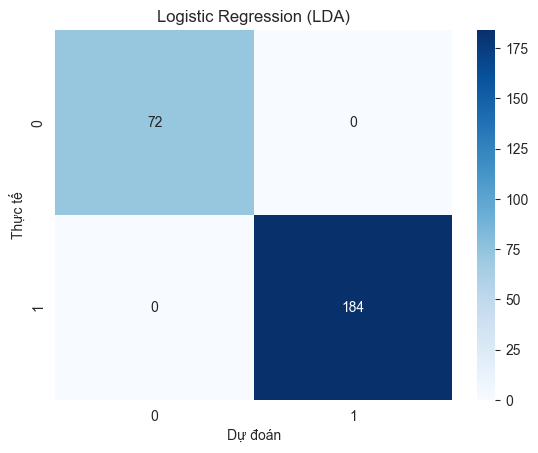

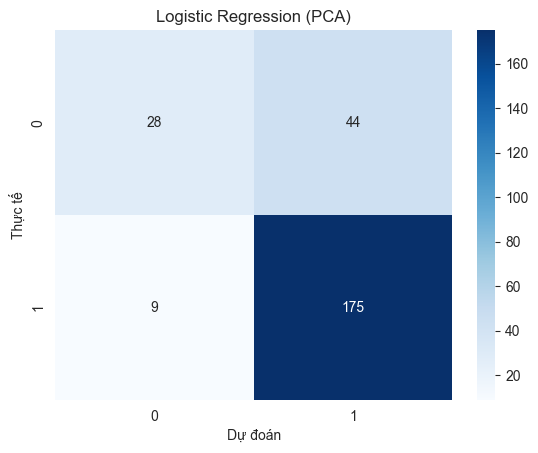

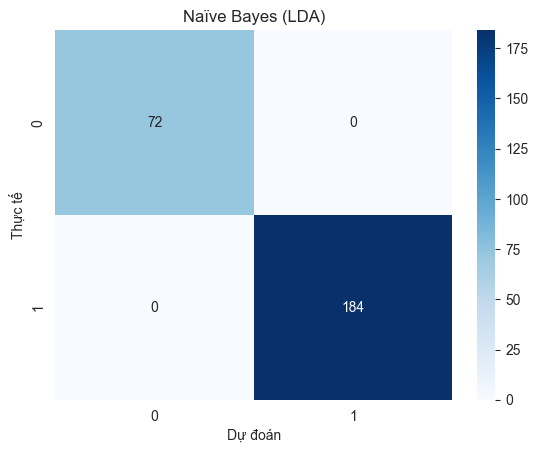

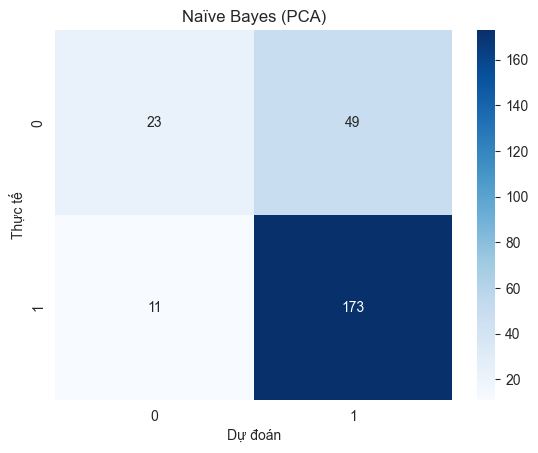

In [49]:
# Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.show()

# Ma trận nhầm lẫn Logistic Regression (LDA và PCA)
plot_confusion_matrix(y_test_lda, y_pred_lda, "Logistic Regression (LDA)")
plot_confusion_matrix(y_test_pca, y_pred_pca, "Logistic Regression (PCA)")

# Ma trận nhầm lẫn Naïve Bayes (LDA và PCA)
plot_confusion_matrix(y_test_lda, y_pred_nb_lda, "Naïve Bayes (LDA)")
plot_confusion_matrix(y_test_pca, y_pred_nb_pca, "Naïve Bayes (PCA)")


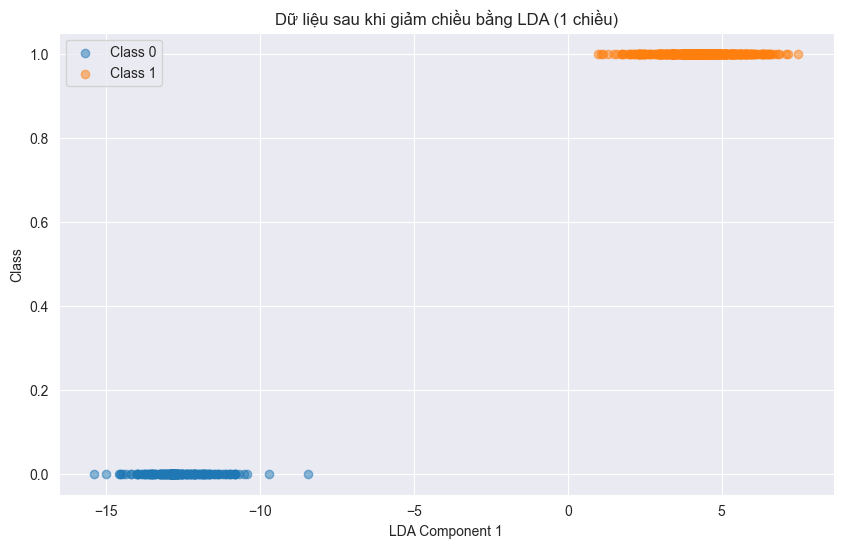

In [54]:
# Chuyển species thành mảng numpy để dễ xử lý
y = np.array(species)

# Tạo scatter plot
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label], [label] * sum(y == label),
                label=f'Class {label}', alpha=0.5)

# Đặt nhãn và tiêu đề
plt.xlabel('LDA Component 1')
plt.ylabel('Class')
plt.title('Dữ liệu sau khi giảm chiều bằng LDA (1 chiều)')
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.show()

# Dựa vào đồ thị ta thấy do 2 class không chồng chéo lên nhau nên LDA có thể dễ dàng tách các lớp đó trong không gian 1 chiều, dẫn đến dự đoán hoàn hảo.

# 2.

In [55]:
# Chia dữ liệu gốc với tỷ lệ 3:1
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.25, random_state=42)


In [59]:
# Logistic Regression với dữ liệu gốc
model_orig_lr = LogisticRegression()
model_orig_lr.fit(X_train_orig, y_train_orig)
y_pred_orig_lr = model_orig_lr.predict(X_test_orig)
accuracy_orig_lr = accuracy_score(y_test_orig, y_pred_orig_lr)

# Naive Bayes với dữ liệu gốc
model_orig_nb = GaussianNB()
model_orig_nb.fit(X_train_orig, y_train_orig)
y_pred_orig_nb = model_orig_nb.predict(X_test_orig)
accuracy_orig_nb = accuracy_score(y_test_orig, y_pred_orig_nb)

print(f"Độ chính xác Logistic Regression (Dữ liệu gốc): {accuracy_orig_lr:.4f}")
print(f"Độ chính xác Naive Bayes (Dữ liệu gốc): {accuracy_orig_nb:.4f}")


Độ chính xác Logistic Regression (Dữ liệu gốc): 0.8201
Độ chính xác Naive Bayes (Dữ liệu gốc): 0.7249


# Logistic Regression ít bị ảnh hưởng bởi giảm chiều đặc biệt là khi dùng LDA vì cả 2 cùng hướng tới phân tách tuyến tính còn NB nhạy cảm hơn với việc giảm chiều vì giả định độc lập bị ảnh hưởng mạnh bởi sự mất mát thông tin

# B. LDA FOR MULTINOMIAL DATA
# Ví dụ B.1.

In [16]:

from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

In [17]:
np.set_printoptions(precision = 4)
mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X[Y==cl], axis=0))
    print('Mean vector of class', cl+1, mean_vectors[cl],'.T')

Mean vector of class 1 [5.006 3.428 1.462 0.246] .T
Mean vector of class 2 [5.936 2.77  4.26  1.326] .T
Mean vector of class 3 [6.588 2.974 5.552 2.026] .T


In [18]:
S_W = np.zeros((4,4))
for cl, mv in zip(range(0, 3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X[Y == cl]:
        row = row.reshape(4, 1)
        mv = mv.reshape(4, 1)
        class_sc_mat += (row - mv).dot((row -mv).T)
    S_W += class_sc_mat

print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [19]:
#the calculate the overall mean with a simple function
overall_mean = np.mean(X, axis = 0)

#initialize zeros mnatrix
S_B = np.zeros((4,4))
#For every iteration in the mean vectors
for cl,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X[Y==cl,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean) .dot((mean_vec - overall_mean).T)

print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [20]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8851]
 [-0.2946]
 [-0.2726]
 [-0.2356]]
Eigenvalue 3: 3.53e-15

Eigenvector 4: 
[[-0.8059]
 [ 0.4043]
 [ 0.4127]
 [-0.129 ]]
Eigenvalue 4: 3.17e-17


In [21]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print (i[0])

print("Variance Explained: \n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Eigenvalues in decreasing order: 

32.19192919827803
0.28539104262306414
3.5296362660244315e-15
3.17116800810927e-17
Variance Explained: 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In [22]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]


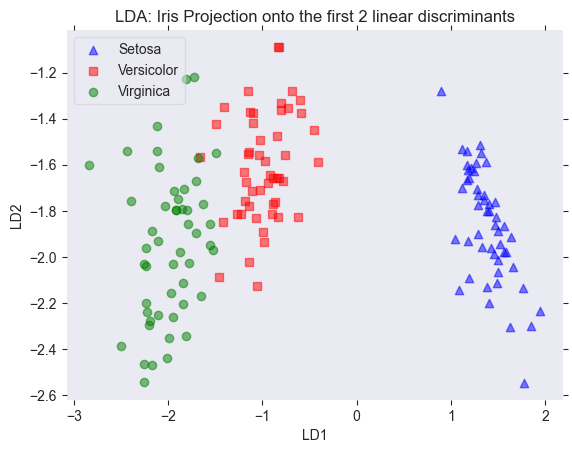

In [23]:
X_lda= X.dot (W)
#will throw an error in case the dot product has made an error assert
X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"

def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0,3), ("^", "s", "o"), ("blue", "red", "green")):
        plt.scatter (x = X_lda[:,0].real [Y== label],
            y= X_lda[:,1].real [Y ==label],
            marker = marker,
            color =color,
            alpha = 0.5,
            label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend (loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha (0.5)
    plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
    plt.tick_params (axis="both", which = "both", bottom = "off", top = "off",
                    labelbottom = "on", left = "off", right= "off", labelleft = "on")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible (False)
    ax.spines["bottom"].set_visible (False)
    ax.spines["left"].set_visible (False)
    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

explained variance ratio (first two components): [0.9246 0.0531]


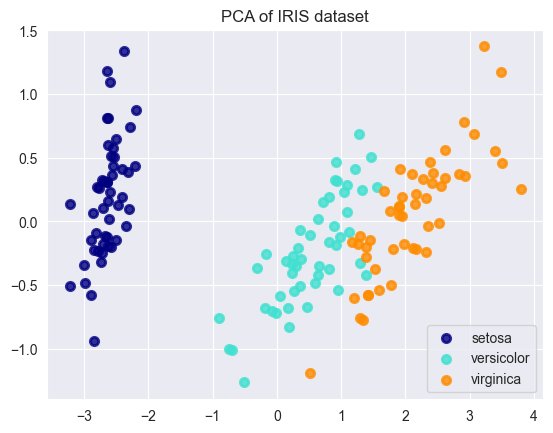

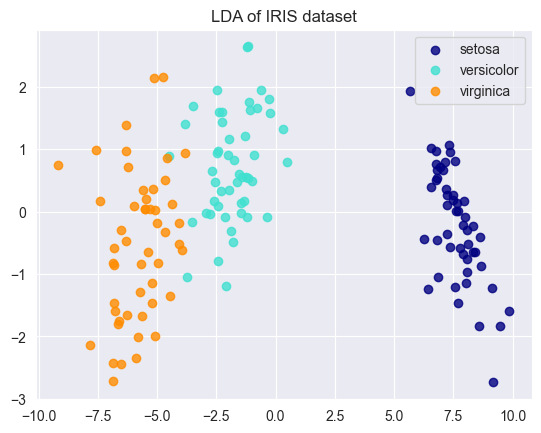

In [24]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print("explained variance ratio (first two components): %s" % str(pca.explained_variance_ratio_))
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

### Yêu cầu thực hành


In [25]:
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Chia dữ liệu Train:Test = 4:1 với stratification để đảm bảo cân bằng giữa các lớp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

=== Kết quả với dữ liệu nguyên bản ===
Độ chính xác: 0.9333
Ma trận nhầm lẫn:


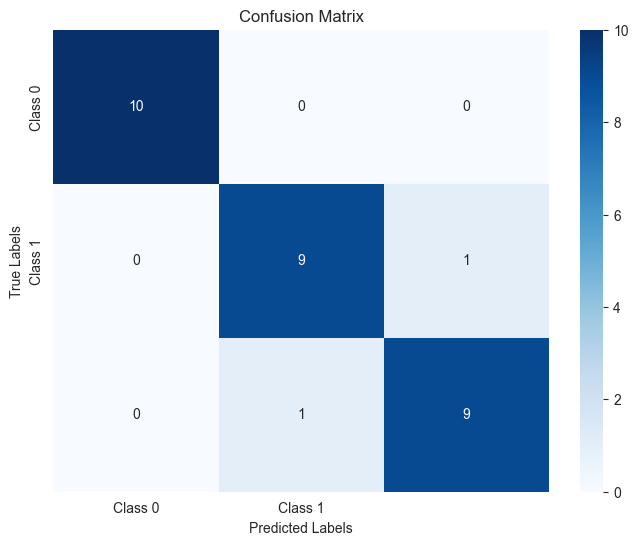

In [26]:
# a) Với dữ liệu nguyên bản
print("=== Kết quả với dữ liệu nguyên bản ===")
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train_scaled, y_train)
y_pred_original = lr_original.predict(X_test_scaled)

accuracy_original = accuracy_score(y_test, y_pred_original)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)

print(f"Độ chính xác: {accuracy_original:.4f}")
print("Ma trận nhầm lẫn:")
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


=== Kết quả với PCA (2 chiều) ===
1. Độ chính xác: 0.9000
2. Tỷ lệ phương sai giải thích: [0.7268 0.2307]
3. Ma trận nhầm lẫn:


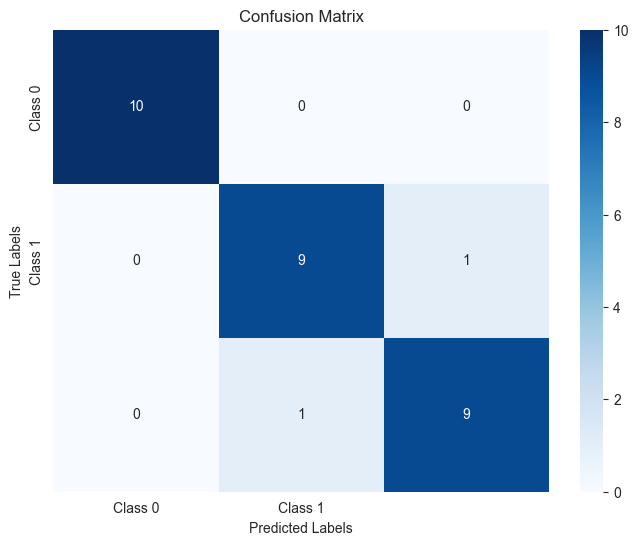

In [27]:
# b) Với dữ liệu giảm chiều
# i) Sử dụng PCA
print("\n=== Kết quả với PCA (2 chiều) ===")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print(f"1. Độ chính xác: {accuracy_pca:.4f}")
print(f"2. Tỷ lệ phương sai giải thích: {pca.explained_variance_ratio_}")
print("3. Ma trận nhầm lẫn:")
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


=== Kết quả với LDA (2 chiều) ===
Độ chính xác: 1.0000
Ma trận nhầm lẫn:


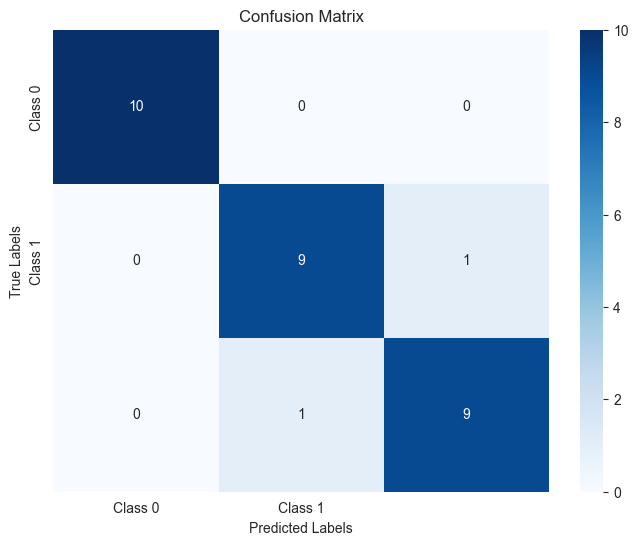

In [28]:
# ii) Sử dụng LDA
print("\n=== Kết quả với LDA (2 chiều) ===")
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

lr_lda = LogisticRegression(max_iter=1000)
lr_lda.fit(X_train_lda, y_train)
y_pred_lda = lr_lda.predict(X_test_lda)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

print(f"Độ chính xác: {accuracy_lda:.4f}")
print("Ma trận nhầm lẫn:")
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

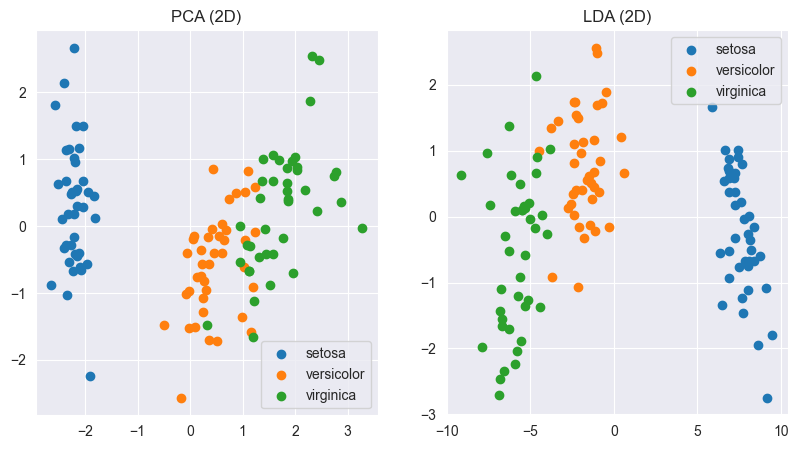

In [29]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(15, 5))

# PCA
plt.subplot(131)
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_pca[y_train == i, 0],
                X_train_pca[y_train == i, 1],
                label=target_name)
plt.title('PCA (2D)')
plt.legend()

# LDA
plt.subplot(132)
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_lda[y_train == i, 0],
                X_train_lda[y_train == i, 1],
                label=target_name)
plt.title('LDA (2D)')
plt.legend()

plt.show()

# Ví dụ B2 (Bài tập thực hành 2):

In [36]:
import os
import gzip
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


data_path = r"D:\Hoc may\Bài thực hành 4\handwritting"

# Train path
train_images_path = f"{data_path}\\train-images-idx3-ubyte.gz"
train_labels_path = f"{data_path}\\train-labels-idx1-ubyte.gz"

# Test path
test_images_path = f"{data_path}\\t10k-images-idx3-ubyte.gz"
test_labels_path = f"{data_path}\\t10k-labels-idx1-ubyte.gz"



In [31]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

# Gọi phương thức đọc dữ liệu để kiếm tra xem đọc đúng hay không:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(  test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

(5000, 784) (5000,)
(10000, 784) (10000,)


6 4


<Figure size 640x480 with 0 Axes>

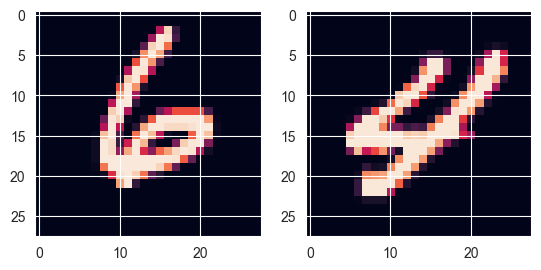

In [32]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])

train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [37]:
# 1) Đọc dữ liệu và giảm chiều
# Lấy 5000 ảnh bất kỳ
X, y = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
print("Kích thước ban đầu:", X.shape)

# Giảm chiều với PCA xuống 100
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
print("Kích thước sau PCA:", X_pca.shape)

# Giảm chiều với LDA xuống 8 (số lớp - 1 = 10 - 1 = 9, nhưng ta chọn 8)
lda = LDA(n_components=8)
X_lda = lda.fit_transform(X, y)
print("Kích thước sau LDA:", X_lda.shape)

Kích thước ban đầu: (5000, 784)
Kích thước sau PCA: (5000, 100)
Kích thước sau LDA: (5000, 8)


In [38]:
# 2) Phân loại và so sánh
def train_and_evaluate(X_data, y_data, data_name):
    # Chia dữ liệu
    X_train, X_val, y_train, y_val = train_test_split(
        X_data, y_data, test_size=0.3, random_state=42
    )

    # Huấn luyện và đánh giá
    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)

    start_time = time.time()
    lr.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = lr.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f"\nKết quả với {data_name}:")
    print(f"Độ chính xác: {accuracy:.4f}")
    print(f"Thời gian huấn luyện: {train_time:.4f} giây")

    return accuracy, train_time

# a) Dữ liệu nguyên bản (784 chiều)
acc_orig, time_orig = train_and_evaluate(X, y, "dữ liệu nguyên bản (784 chiều)")

# b) Dữ liệu PCA (100 chiều)
acc_pca, time_pca = train_and_evaluate(X_pca, y, "dữ liệu PCA (100 chiều)")

# c) Dữ liệu LDA (8 chiều)
acc_lda, time_lda = train_and_evaluate(X_lda, y, "dữ liệu LDA (8 chiều)")



Kết quả với dữ liệu nguyên bản (784 chiều):
Độ chính xác: 0.8687
Thời gian huấn luyện: 1.7901 giây

Kết quả với dữ liệu PCA (100 chiều):
Độ chính xác: 0.8293
Thời gian huấn luyện: 3.5700 giây

Kết quả với dữ liệu LDA (8 chiều):
Độ chính xác: 0.9100
Thời gian huấn luyện: 0.0468 giây


In [39]:

# So sánh và kết luận
print("\nSo sánh tổng hợp:")
print(f"{'Phương pháp':<20} {'Độ chính xác':<15} {'Thời gian (s)':<15}")
print("-" * 50)
print(f"{'Nguyên bản':<20} {acc_orig:<15.4f} {time_orig:<15.4f}")
print(f"{'PCA':<20} {acc_pca:<15.4f} {time_pca:<15.4f}")
print(f"{'LDA':<20} {acc_lda:<15.4f} {time_lda:<15.4f}")

# Đưa ra nhận xét
best_method = max([("Nguyên bản", acc_orig, time_orig),
                  ("PCA", acc_pca, time_pca),
                  ("LDA", acc_lda, time_lda)],
                 key=lambda x: x[1])

print(f"\n*Nhận xét:")
print(f"- Phương pháp tốt nhất về độ chính xác: {best_method[0]} (accuracy: {best_method[1]:.4f})")
print(f"- Phương pháp nhanh nhất: {min([('Nguyên bản', time_orig), ('PCA', time_pca), ('LDA', time_lda)], key=lambda x: x[1])[0]}")
print("- Có sự bất thường khi tốc độ chạy PCA lớn hơn Nguyên bản")
print("- LDA với chỉ 8 chiều mà đạt accuracy cao hơn nguyên bản (784 chiều) là khá bất ngờ, có vẻ có vấn đề trong dữ liêuj.")
print("*Kết luận: ")
print("- Nếu ưu tiên độ chính xác: Chọn", best_method[0])


So sánh tổng hợp:
Phương pháp          Độ chính xác    Thời gian (s)  
--------------------------------------------------
Nguyên bản           0.8687          1.7901         
PCA                  0.8293          3.5700         
LDA                  0.9100          0.0468         

*Nhận xét:
- Phương pháp tốt nhất về độ chính xác: LDA (accuracy: 0.9100)
- Phương pháp nhanh nhất: LDA
- Có sự bất thường khi tốc độ chạy PCA lớn hơn Nguyên bản
- LDA với chỉ 8 chiều mà đạt accuracy cao hơn nguyên bản (784 chiều) là khá bất ngờ, có vẻ có vấn đề trong dữ liêuj.
*Kết luận: 
- Nếu ưu tiên độ chính xác: Chọn LDA


# Bài tập tự thực hành


In [3]:
import numpy as np
import cv2
import os

# Path to the database
path = 'face_data\\'

# Khai báo danh sách ID và trạng thái
ids = range(1, 16)  # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight', 'sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'  # file extension is png

# Get the first image to determine its size
fn = os.path.join(path, prefix + '01.' + states[0] + surfix)  # 🔥 Sửa cách ghép chuỗi
im = cv2.imread(fn, cv2.IMREAD_UNCHANGED)



if im is None:
    print(f"⚠️ Failed to read image: {fn}. Please check the path or file.")
    exit()  # Exit the program if the first image is not readable

h, w = im.shape  # height, width
D = h * w  # Dimensions of each image
N = len(states) * len(ids)  # Total number of images
print(N, D, h, w)

X = np.zeros((D, N))  # Dataset

# Collect all data
count = 0

for person_id in ids:
    for state in states:
        fn = os.path.join(path, f"{prefix}{str(person_id).zfill(2)}.{state}{surfix}")  # 🔥 Cách ghép chuỗi đúng
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        if tmp is None:
            print(f"⚠️ Failed to read image: {fn}. Skipping...")
            continue  # Skip missing or unreadable images

        X[:, count] = tmp.reshape(D)
        count += 1

print(f"✅ Successfully loaded {count} images.")


165 77760 243 320
✅ Successfully loaded 165 images.


In [4]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn y
y = np.repeat(np.arange(15), 11)  # 15 người, mỗi người 11 trạng thái

# a. Giảm chiều dữ liệu xuống 135 bằng PCA
pca = PCA(n_components=135)
X_reduced = pca.fit_transform(X.T)  # Chuyển vị X để có shape (165, 77760)
print("Shape sau khi giảm chiều:", X_reduced.shape)

Shape sau khi giảm chiều: (165, 135)


In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# b. Phân loại với train:test = 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42
)

# Multinomial Logistic Regression
lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Độ chính xác Logistic Regression:", lr_accuracy)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Độ chính xác Naive Bayes:", nb_accuracy)

import warnings
warnings.filterwarnings('ignore')

Độ chính xác Logistic Regression: 0.98
Độ chính xác Naive Bayes: 0.76



Dự đoán cho 5 ảnh mới:
Ảnh 1:
Logistic Regression dự đoán: Người 1
Naive Bayes dự đoán: Người 1
Ảnh 2:
Logistic Regression dự đoán: Người 1
Naive Bayes dự đoán: Người 1
Ảnh 3:
Logistic Regression dự đoán: Người 5
Naive Bayes dự đoán: Người 9
Ảnh 4:
Logistic Regression dự đoán: Người 5
Naive Bayes dự đoán: Người 9
Ảnh 5:
Logistic Regression dự đoán: Người 1
Naive Bayes dự đoán: Người 1


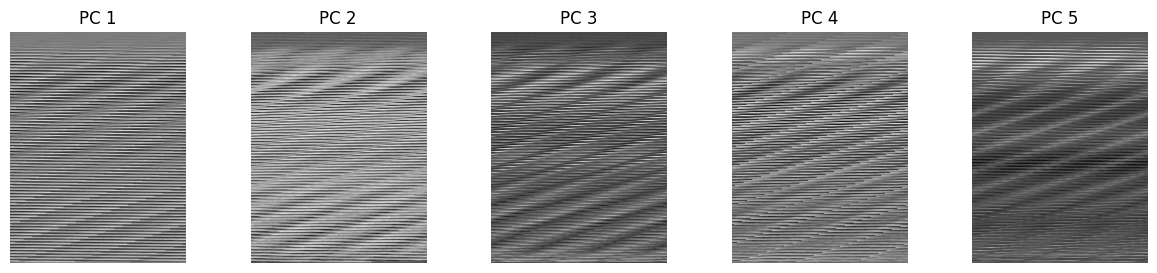

In [19]:


# Hàm tiền xử lý ảnh mới
def preprocess_new_image(image_path, target_size=(320, 243)):
    # Đọc ảnh và chuyển sang grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception(f"Không thể đọc ảnh: {image_path}")

    # Resize về kích thước mong muốn
    img_resized = cv2.resize(img, (target_size[1], target_size[0]))

    # Chuyển thành vector
    img_vector = img_resized.reshape(-1)

    # Áp dụng PCA đã train
    img_reduced = pca.transform(img_vector.reshape(1, -1))

    return img_reduced

# Danh sách 5 ảnh mới
new_image_paths = [
    'vd/1.jpg',
    'vd/2.jpg',
    'vd/3.jpg',
    'vd/4.jpg',
    'vd/5.jpg'
]


# Xử lý và dự đoán cho từng ảnh mới
print("\nDự đoán cho 5 ảnh mới:")
for i, img_path in enumerate(new_image_paths):
    try:
        # Kiểm tra file có tồn tại không
        if not os.path.exists(img_path):
            print(f"⚠️ File không tồn tại: {img_path}")
            continue

        # Tiền xử lý ảnh
        img_processed = preprocess_new_image(img_path)

        # Dự đoán với cả hai mô hình
        lr_pred = lr.predict(img_processed)
        nb_pred = nb.predict(img_processed)

        print(f"Ảnh {i+1}:")
        print(f"Logistic Regression dự đoán: Người {lr_pred[0] + 1}")
        print(f"Naive Bayes dự đoán: Người {nb_pred[0] + 1}")

    except Exception as e:
        print(f"Lỗi khi xử lý ảnh {i+1}: {str(e)}")

# Trực quan hóa một số thành phần chính (PCA)
n_components_to_show = 5
plt.figure(figsize=(15, 3))
for i in range(n_components_to_show):
    plt.subplot(1, n_components_to_show, i+1)
    plt.imshow(pca.components_[i].reshape(320, 243), cmap='gray')
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.show()
